### PCA降维与可视化
洪亮 181240019  
2019.5.1

#### 手工解法

In [1]:
import seaborn
import numpy as np
import pandas as pd

In [2]:
a = seaborn.load_dataset('titanic')

In [3]:
a.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
b = a.loc[:,'survived':'pclass']

In [5]:
b['sibsp'] = a.loc[:,'sibsp']
b['parch'] = a.loc[:,'parch']

In [6]:
b.head()

,survived,pclass,sibsp,parch
0,0,3,1,0
1,1,1,1,0
2,1,3,0,0
3,1,1,1,0
4,0,3,0,0


In [7]:
b = b-b.mean()

In [9]:
b.corr()

,survived,pclass,sibsp,parch
survived,1.000000,-0.338481,-0.035322,0.081629
pclass,-0.338481,1.000000,0.083081,0.018443
sibsp,-0.035322,0.083081,1.000000,0.414838
parch,0.081629,0.018443,0.414838,1.000000


In [24]:
arr = np.array(b.corr())

In [25]:
arr

array([[ 1.        , -0.33848104, -0.0353225 ,  0.08162941],
       [-0.33848104,  1.        ,  0.08308136,  0.01844267],
       [-0.0353225 ,  0.08308136,  1.        ,  0.4148377 ],
       [ 0.08162941,  0.01844267,  0.4148377 ,  1.        ]])

In [28]:
eigenvalues, eigenvectors = np.linalg.eig(arr)

In [29]:
eigenvalues

array([0.66174628, 0.56687552, 1.3403996 , 1.4309786 ])

In [30]:
idx = eigenvalues.argsort()[::-1]

In [31]:
idx

array([3, 2, 0, 1])

In [32]:
eigenvectors = eigenvectors[:, idx]
eigenvectors = eigenvectors[:, :2]

In [36]:
re = np.matmul(b, eigenvectors)

In [37]:
re

array([[ 0.33939471,  0.75682947],
       [-0.38659205, -1.21545784],
       [-0.50810071,  0.2024685 ],
       ...,
       [ 1.63266286,  0.15416358],
       [-1.07671355, -1.07624835],
       [-0.35072679,  0.89603895]])

In [38]:
x = [a[0] for a in re]
y = [a[1] for a in re]

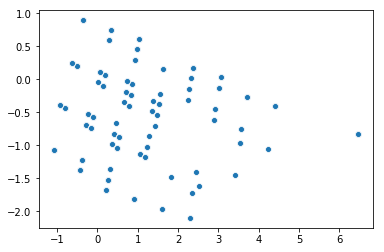

In [39]:
seaborn.scatterplot(x = x , y = y)

#### TSNE

In [43]:
import numpy as np
from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=2).fit_transform(b)
X_embedded.shape

(891, 2)

In [49]:
x1 = [m[0] for m in X_embedded]
y1 = [m[1] for m in X_embedded]

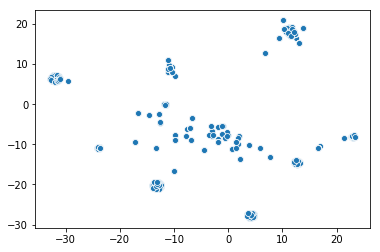

In [50]:
seaborn.scatterplot(x = x1 , y = y1)

> **Reference**  
> [PCA的数学原理](http://blog.codinglabs.org/articles/pca-tutorial.html)  
> [主成分分析](http://deeplearning.stanford.edu/wiki/index.php/主成分分析)  
> [PCA源码](https://github.com/RRdmlearning/Machine-Learning-From-Scratch/tree/master/pca)  
> [sklearn.manifold.TSNE](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html)